<div style="display: flex; justify-content: center; align-items: center; background-color: #644FBA; color: #FFFF; padding: 30px;">
<h1 style="margin: 0;">Automatic Detection Algorithm for Counterfeit Banknotes</h1>
</div>


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h1 style="color: #644FBA; margin-top: 0;">Objective of This Notebook</h1>
  <p style="color: #1E173B;">
    When a banknote arrives, we have a machine that records all its geometric characteristics. 
    Over our years of effort, we have observed differences in dimensions between genuine and counterfeit banknotes. 
    These differences are difficult to detect with the naked eye, but a machine should have no problem distinguishing them.
  </p>
  <p style="color: #1E173B;">
    Thus, an algorithm should be built that, based on the geometric characteristics of a banknote, 
    would be capable of determining whether it is genuine or counterfeit.
  </p>
</div>


------

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing the libraries</h2>
</div>    


In [350]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Importing the dataset</h2>
</div>    


In [351]:
df = pd.read_csv("dataset/billets.csv", delimiter=";", header=None)

Handling the issue of missing header for the dataset

In [352]:
df.columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df = df.iloc[1:].reset_index(drop=True)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #5A45B0; margin-top: 0;">Information about the data
</h2>
</div>    


In [353]:
df.shape

(1500, 7)

In [354]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [355]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500,1500,1500,1463,1500,1500
unique,2,159,155,170,285,123,336
top,True,171.99,103.95,103.76,4.08,3.08,113.38
freq,1000,28,30,28,20,35,19


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   object
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: object(7)
memory usage: 82.2+ KB


In [357]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Taking care of missing data
</h2>
</div>    

In [358]:
df['is_genuine'] = df['is_genuine'].replace({'True': True, 'False': False})
df['is_genuine'] = df['is_genuine'].astype(int)

In [359]:
df.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.5,4.4,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   int32 
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: int32(1), object(6)
memory usage: 76.3+ KB


In [361]:
df['diagonal'] = pd.to_numeric(df['diagonal'], errors='coerce')
df['height_left'] = pd.to_numeric(df['height_left'], errors='coerce')
df['height_right'] = pd.to_numeric(df['height_right'], errors='coerce')
df['margin_up'] = pd.to_numeric(df['margin_up'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   object 
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 76.3+ KB


### Training a model to predict missing values in margin_low

In [363]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [364]:
train_data = df.dropna(subset=['margin_low'])

In [365]:
missing_data = df[df['margin_low'].isnull()]

In [366]:
X_train = train_data.drop(columns=['margin_low'])
y_train = train_data['margin_low']

In [367]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [368]:
X_missing = missing_data.drop(columns=['margin_low'])
predictions = model.predict(X_missing)

In [369]:
from sklearn.metrics import r2_score

predicted_values = model.predict(X_train)

r2 = r2_score(y_train, predicted_values)

print(f"R^2 Score: {r2}")


R^2 Score: 1.0


In [370]:
df.loc[df['margin_low'].isnull(), 'margin_low'] = predictions

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   object 
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 76.3+ KB


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #644FBA; padding: 20px; margin-bottom: 20px;">
  <h1 style="color: #5A45B0; margin-top: 0;">Training the model using new data to detect counterfeit banknotes
</h1>
</div>    

In [372]:
df_new = df

In [373]:
df_new.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.4,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Data Visualization
</h2>
</div>    

In [374]:
import seaborn as sns

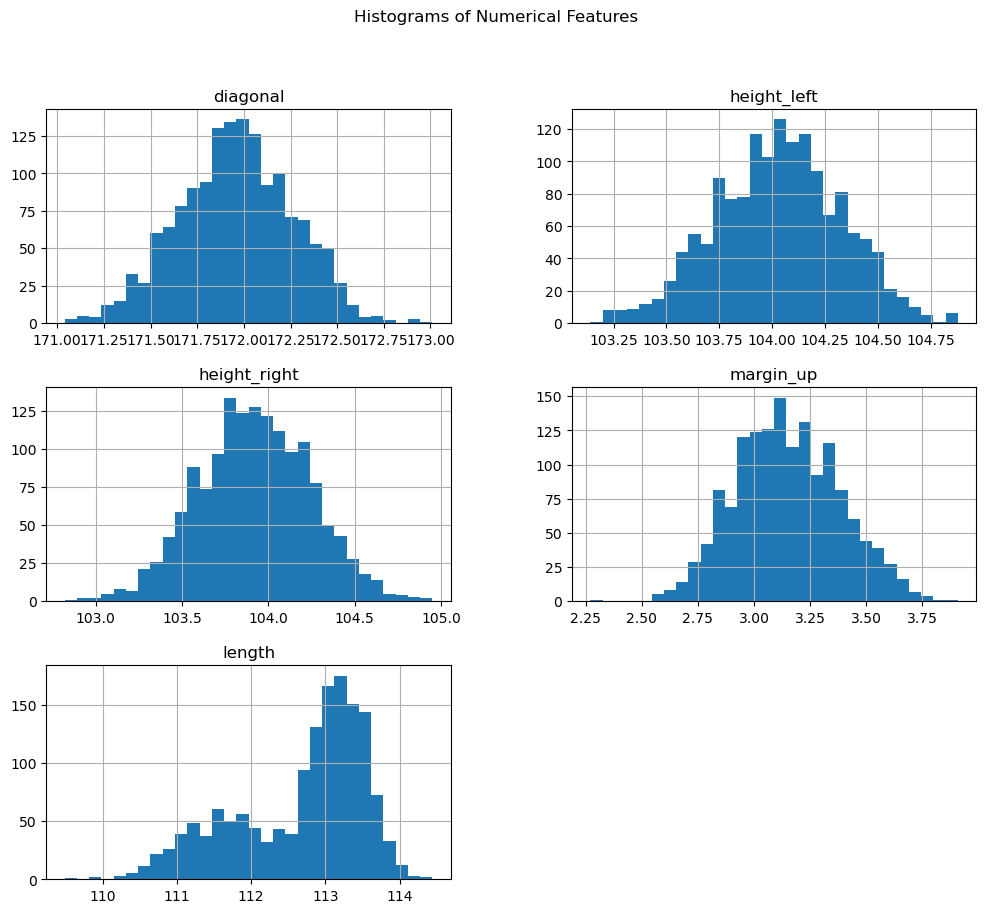

In [375]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

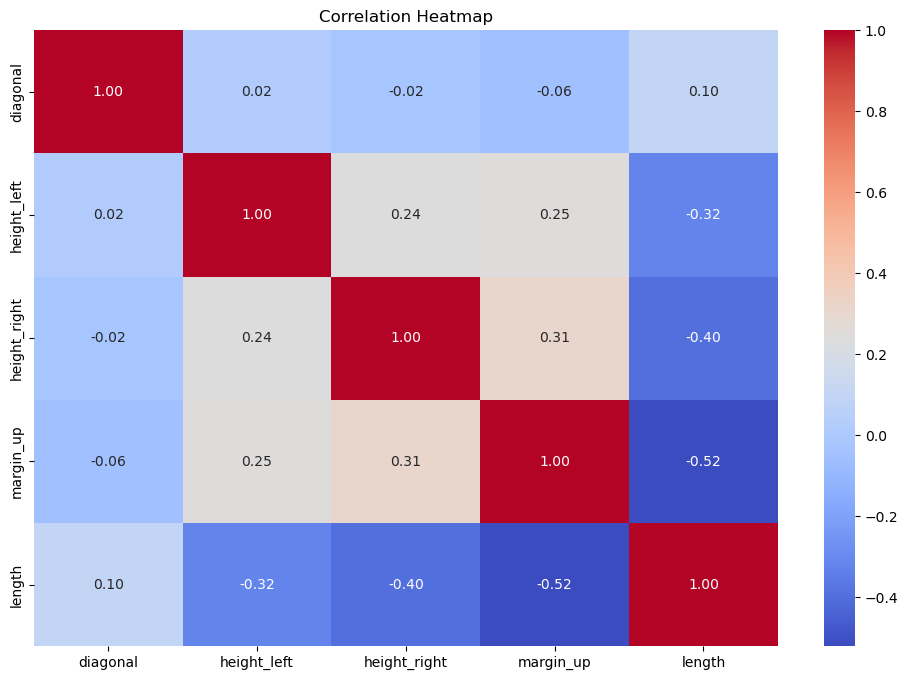

In [376]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


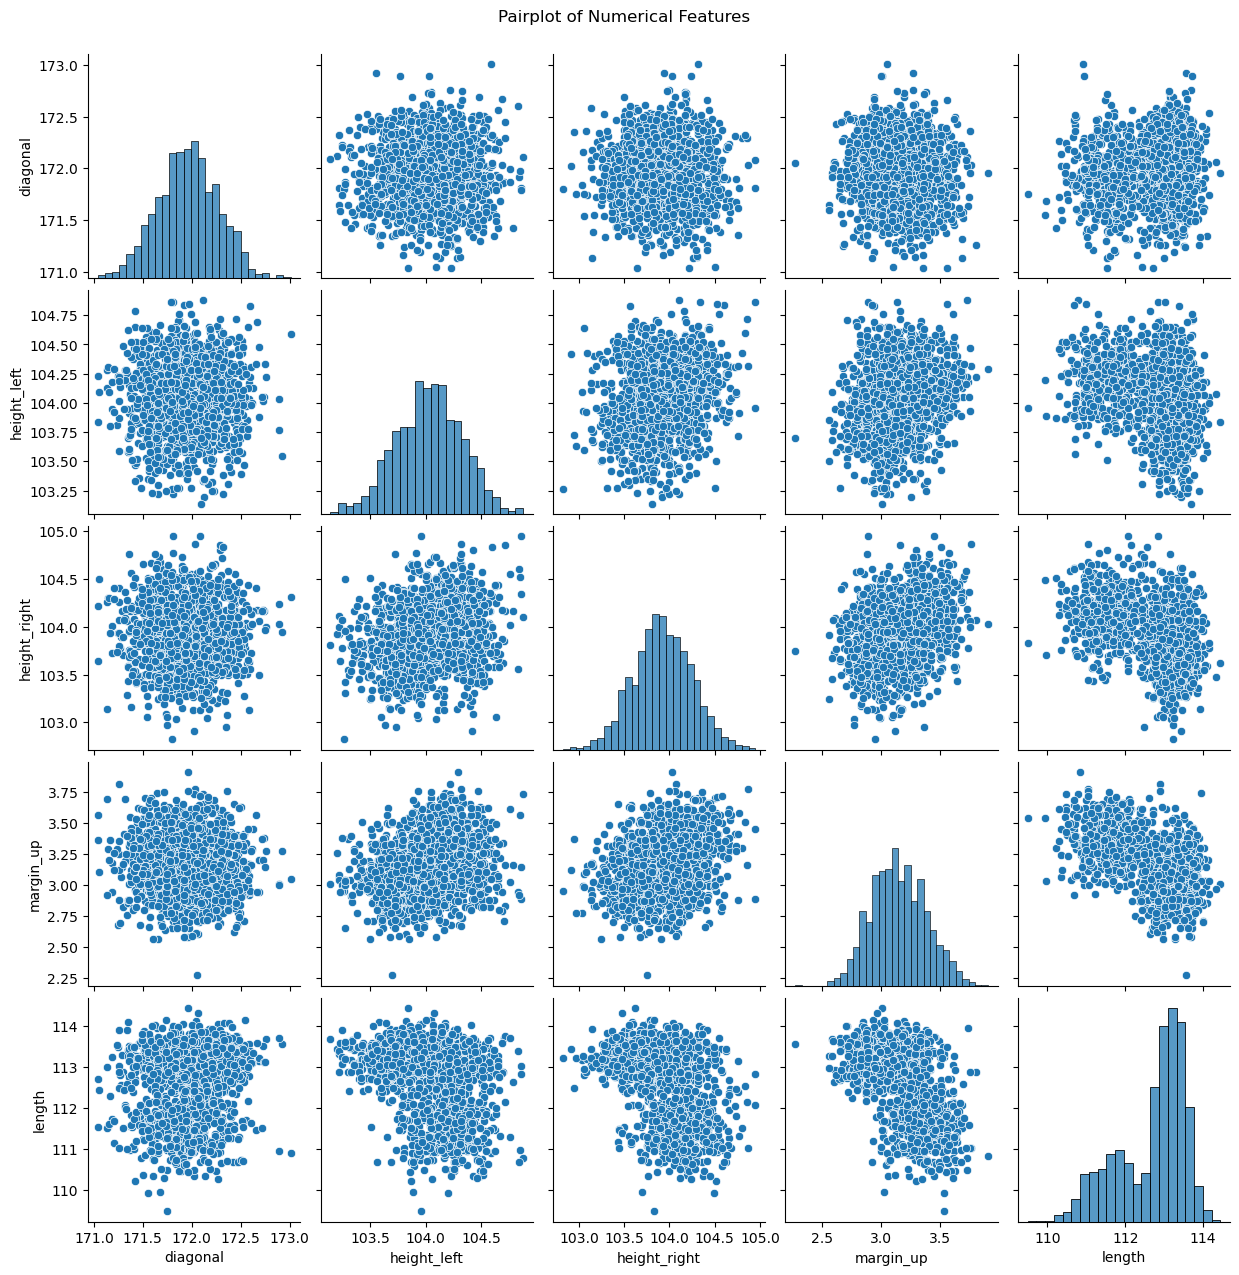

In [377]:
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Building and Training Models
</h2>
</div>    

In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [379]:
def classification_models(X, y, test_size=0.2, random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state)
    }
    
    results = {}
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        report = classification_report(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            'Accuracy': f"{accuracy * 100 :.3f} %",
            'Classification Report': report,
            'Confusion Matrix': cm
        }
    
    return results

In [380]:
X = df_new.drop(columns=['is_genuine'])  
y = df_new['is_genuine'] 

In [381]:
results = classification_models(X, y)

In [382]:
for model_name, result in results.items():
    print("\n")
    print("-"*55)
    print(f"{model_name} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n")
print("-"*55)



-------------------------------------------------------
Decision Tree Results:
Accuracy: 97.667 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        97
           1       0.99      0.98      0.98       203

    accuracy                           0.98       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:
[[ 95   2]
 [  5 198]]




-------------------------------------------------------
Logistic Regression Results:
Accuracy: 99.667 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[ 96   1]
 [  0 203]]




------

<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
  <h2 style="color: #E97F61; margin-top: 0;">Choosing a More Efficient Model
</h2>
</div>

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [384]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [385]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy {accuracy * 100 :.3f} %")

Accuracy 99.667 %


In [386]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
    <h2 style="color: #E97F61; margin-top: 0;">Exporting the Model in Format " joblib "
</h2>
</div>

In [387]:
import joblib

In [388]:
joblib.dump(model, 'logistic_regression_model.joblib')
print("Model saved successfully as 'logistic_regression_model.joblib'.")

Model saved successfully as 'logistic_regression_model.joblib'.


<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; border-left: 5px solid #E97F61; padding: 20px; margin-bottom: 20px;">
    <h2 style="color: #E97F61; margin-top: 0;">Testing the Model 
</h2>
</div>

In [389]:
LR_model = joblib.load('logistic_regression_model.joblib')
y_pred = LR_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [390]:
df_test_view = X_test

In [391]:
df_test_view.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length
471,172.58,104.17,103.13,4.64,3.17,113.05
9,172.47,104.07,104.02,4.04,3.25,113.45
1499,171.47,104.15,103.82,4.63,3.37,112.07
54,172.02,103.58,103.80,3.95,3.46,112.40
1411,171.95,104.39,104.31,5.98,3.23,111.33


In [392]:
y_test_new = y_test
df_test_view["is_genuine_test"] =  y_test_new
df_test_view["is_genuine_pred"] = y_pred

In [393]:
df_test_view["is_genuine_test"] = df_test_view["is_genuine_test"].replace({0: False, 1: True})
df_test_view["is_genuine_pred"] = df_test_view["is_genuine_pred"].replace({0: False, 1: True})

In [394]:
df_test_view

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_test,is_genuine_pred
471,172.58,104.17,103.13,4.64,3.17,113.05,True,True
9,172.47,104.07,104.02,4.04,3.25,113.45,True,True
1499,171.47,104.15,103.82,4.63,3.37,112.07,False,False
54,172.02,103.58,103.80,3.95,3.46,112.40,True,True
1411,171.95,104.39,104.31,5.98,3.23,111.33,False,False
...,...,...,...,...,...,...,...,...
220,171.26,103.59,103.80,4.11,3.25,113.03,True,True
946,171.63,103.87,104.66,4.42,3.27,112.68,True,True
992,171.79,103.69,103.68,3.65,2.77,112.78,True,True
1496,172.19,104.63,104.44,5.27,3.37,110.97,False,False


In [395]:
mismatch_count = (df_test_view["is_genuine_test"] != df_test_view["is_genuine_pred"]).sum()

print(f"Number of mismatched rows: {mismatch_count}")

Number of mismatched rows: 1


### Model Performance Note: Logistic Regression
---
<div style="border: 2px solid #4CAF50; border-radius: 5px; padding: 10px; background-color: #f9f9f9;">
  <h3 style="color: #4CAF50;">Model Performance Summary</h3>
  <p>
    Out of <b>300 rows</b>, the <b>Logistic Regression</b> model achieved an accuracy of <b>99.667%</b>, with only 
    <span style="color: red;"><b>1 error</b></span>.
  </p>
  <h4 style="color: #2196F3;">Explanation of the Error:</h4>
  <ul>
    <li><b>True Class:</b> <span style="color: #FF5722;">0</span> (Negative class)</li>
    <li><b>Predicted Class:</b> <span style="color: #4CAF50;">1</span> (Positive class)</li>
  </ul>
  <p>
    The model incorrectly identified one row as part of the positive class instead of the negative class. 
    Such errors can arise due to overlapping feature distributions or dataset limitations.
  </p>
  <h4 style="color: #2196F3;">Key Metrics:</h4>
  <ul>
    <li><b>Precision:</b> 100%</li>
    <li><b>Recall:</b> 99%</li>
    <li><b>F1-Score:</b> 99%</li>
  </ul>
  <h4 style="color: #4CAF50;">Conclusion:</h4>
  <p>
    While the model performs exceptionally well, this single misclassification highlights the need for further tuning to handle edge cases.
  </p>
</div>
